In [1]:
#@title modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.4f}'.format

In [3]:
# Load the datasets from the internet
train_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')
test_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv')

In [4]:
train_df.shape, test_df.shape

((17000, 9), (3000, 9))

In [5]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3100,34.1900,15.0000,5612.0000,1283.0000,1015.0000,472.0000,1.4936,66900.0000
1,-114.4700,34.4000,19.0000,7650.0000,1901.0000,1129.0000,463.0000,1.8200,80100.0000
2,-114.5600,33.6900,17.0000,720.0000,174.0000,333.0000,117.0000,1.6509,85700.0000
3,-114.5700,33.6400,14.0000,1501.0000,337.0000,515.0000,226.0000,3.1917,73400.0000
4,-114.5700,33.5700,20.0000,1454.0000,326.0000,624.0000,262.0000,1.9250,65500.0000


In [6]:
scale_factor = 1000.0

In [7]:
train_df['median_house_value'] /= scale_factor # Scale the training set's label
test_df["median_house_value"] /= scale_factor # Scale the test set's label

In [8]:
pd.options.display.float_format = '{:.1f}'.format
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [9]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    
    # Add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

In [10]:
def train_model(model, df, feature, label, my_epochs, my_batch_size=None, my_validation_split=0.1):
    history = model.fit(x=df[feature], 
                        y=df[label], 
                        epochs=my_epochs, 
                        batch_size=my_batch_size,
                       validation_split=my_validation_split)
    
    # Gather the model's trained weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch
    
    # Isolate the root mean squared error for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist['root_mean_squared_error']
    
    return epochs, rmse, history.history

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [11]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')
    
    plt.plot(epochs[1:], mae_training[1:], label='Training Loss')
    plt.plot(epochs[1:], mae_validation[1:], label='Validation Loss')
    
    # We're not going to plot the first epoch, since the loss on the first epoch
    # is often substantially greater than the loss for other epochs.
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)
    
    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)
    
    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()
    
print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
136/136 [==============================] - 2s 6ms/step - loss: 38046.0391 - root_mean_squared_error: 195.0539 - val_loss: 46222.1641 - val_root_mean_squared_error: 214.9934
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 21780.2305 - root_mean_squared_error: 147.5813 - val_loss: 26847.2793 - val_root_mean_squared_error: 163.8514
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 11528.2402 - root_mean_squared_error: 107.3696 - val_loss: 14520.8838 - val_root_mean_squared_error: 120.5026
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 7060.7632 - root_mean_squared_error: 84.0284 - val_loss: 9562.2490 - val_root_mean_squared_error: 97.7868
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 6512.1431 - root_mean_squared_error: 80.6979 - val_loss: 9392.4863 - val_root_mean_squared_error: 96.9148
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 6514.7173 - ro

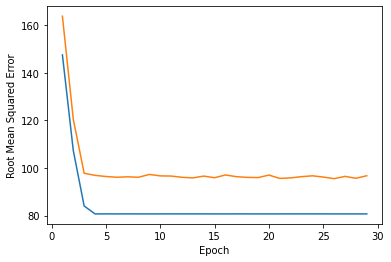

In [12]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [19]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


In [20]:
shuffled_train_df = train_df.sample(frac=1) # shuffle 100%

In [21]:
shuffled_train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1827,-117.3,34.1,31.0,2209.0,636.0,1314.0,562.0,1.7,78.8
11403,-121.2,37.8,38.0,2152.0,451.0,1320.0,457.0,2.5,101.9
14647,-122.2,37.5,35.0,1025.0,242.0,388.0,232.0,5.2,500.0
4964,-118.1,34.1,16.0,2416.0,565.0,1750.0,514.0,2.8,163.7
10941,-120.9,37.8,9.0,4838.0,920.0,2460.0,923.0,3.6,142.7
...,...,...,...,...,...,...,...,...,...
11909,-121.4,38.0,4.0,2477.0,359.0,1234.0,377.0,5.5,162.1
16679,-122.8,38.5,7.0,6837.0,1417.0,3468.0,1405.0,3.2,191.0
4732,-118.1,33.9,34.0,2118.0,437.0,1414.0,442.0,3.7,166.8
7726,-118.4,34.0,40.0,2352.0,598.0,1133.0,563.0,3.2,287.5


In [23]:
shuffled_train_df =  train_df.reindex(np.random.permutation(train_df.index))
shuffled_train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7387,-118.3,34.1,48.0,3551.0,826.0,1601.0,827.0,3.2,400.0
2819,-117.7,34.0,15.0,4363.0,690.0,2410.0,666.0,5.5,179.7
13665,-122.0,37.5,25.0,5405.0,939.0,2831.0,923.0,5.0,222.2
852,-117.1,32.6,37.0,2303.0,379.0,1026.0,357.0,3.5,156.9
15462,-122.3,37.6,34.0,3225.0,726.0,1958.0,656.0,3.7,273.0
...,...,...,...,...,...,...,...,...,...
5570,-118.2,33.9,40.0,2462.0,587.0,1821.0,536.0,3.6,162.6
9372,-119.2,34.2,34.0,2610.0,466.0,1543.0,433.0,4.0,189.0
2620,-117.7,34.0,5.0,1387.0,236.0,855.0,270.0,5.4,201.1
5990,-118.2,33.8,38.0,793.0,193.0,601.0,187.0,2.9,176.1


Epoch 1/30
68/68 [==============================] - 1s 7ms/step - loss: 50533.5469 - root_mean_squared_error: 224.7967 - val_loss: 44434.0977 - val_root_mean_squared_error: 210.7940
Epoch 2/30
68/68 [==============================] - 0s 3ms/step - loss: 39538.9180 - root_mean_squared_error: 198.8440 - val_loss: 34412.2891 - val_root_mean_squared_error: 185.5055
Epoch 3/30
68/68 [==============================] - 0s 2ms/step - loss: 30293.0527 - root_mean_squared_error: 174.0490 - val_loss: 25964.2227 - val_root_mean_squared_error: 161.1342
Epoch 4/30
68/68 [==============================] - 1s 11ms/step - loss: 22636.3535 - root_mean_squared_error: 150.4538 - val_loss: 19117.5254 - val_root_mean_squared_error: 138.2661
Epoch 5/30
68/68 [==============================] - 0s 3ms/step - loss: 16534.0586 - root_mean_squared_error: 128.5848 - val_loss: 13784.8379 - val_root_mean_squared_error: 117.4089
Epoch 6/30
68/68 [==============================] - 0s 2ms/step - loss: 12002.5850 - root

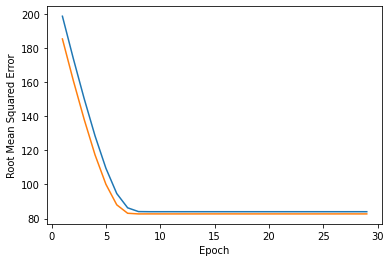

In [32]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size =200

# Split the original training set into a reduced training set and a validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.

# Discard any pre-existing version of the model.
my_model = None

shuffled_train_df =  train_df.reindex(np.random.permutation(train_df.index))

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)
# shuffle된 train 데이터를 사용하여 loss 와 val_loss error 차이를 줄임.
plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

Epoch 1/70
136/136 [==============================] - 1s 4ms/step - loss: 46028.2695 - root_mean_squared_error: 214.5420 - val_loss: 35385.5781 - val_root_mean_squared_error: 188.1105
Epoch 2/70
136/136 [==============================] - 0s 2ms/step - loss: 27104.0801 - root_mean_squared_error: 164.6332 - val_loss: 19748.5215 - val_root_mean_squared_error: 140.5294
Epoch 3/70
136/136 [==============================] - 0s 2ms/step - loss: 14694.2168 - root_mean_squared_error: 121.2197 - val_loss: 10385.8906 - val_root_mean_squared_error: 101.9112
Epoch 4/70
136/136 [==============================] - 0s 2ms/step - loss: 8391.1885 - root_mean_squared_error: 91.6034 - val_loss: 6972.5469 - val_root_mean_squared_error: 83.5018
Epoch 5/70
136/136 [==============================] - 0s 2ms/step - loss: 7057.8696 - root_mean_squared_error: 84.0111 - val_loss: 6864.5010 - val_root_mean_squared_error: 82.8523
Epoch 6/70
136/136 [==============================] - 0s 2ms/step - loss: 7052.9204 - ro

Epoch 46/70
136/136 [==============================] - 0s 3ms/step - loss: 7051.6489 - root_mean_squared_error: 83.9741 - val_loss: 6864.4399 - val_root_mean_squared_error: 82.8519
Epoch 47/70
136/136 [==============================] - 0s 2ms/step - loss: 7051.9688 - root_mean_squared_error: 83.9760 - val_loss: 6863.8130 - val_root_mean_squared_error: 82.8481
Epoch 48/70
136/136 [==============================] - 0s 3ms/step - loss: 7052.5264 - root_mean_squared_error: 83.9793 - val_loss: 6863.5312 - val_root_mean_squared_error: 82.8464
Epoch 49/70
136/136 [==============================] - 0s 3ms/step - loss: 7052.5566 - root_mean_squared_error: 83.9795 - val_loss: 6863.4419 - val_root_mean_squared_error: 82.8459
Epoch 50/70
136/136 [==============================] - 0s 2ms/step - loss: 7053.1558 - root_mean_squared_error: 83.9831 - val_loss: 6865.8447 - val_root_mean_squared_error: 82.8604
Epoch 51/70
136/136 [==============================] - 0s 3ms/step - loss: 7052.4165 - root_mea

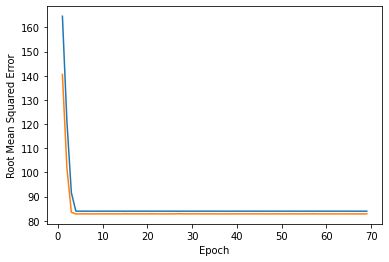

In [35]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Shuffle the examples.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index)) 

# Invoke the functions to build and train the model. Train on the shuffled
# training set.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [36]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 2ms/step - loss: 7008.0898 - root_mean_squared_error: 83.7143
